In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [2]:
finals_temp_data = pd.read_csv('normalizedTEMPFinal.csv').T
mid1_temp_data = pd.read_csv('normalizedTEMPM1.csv').T
mid2_temp_data = pd.read_csv('normalizedTEMPM2.csv').T

finals_HR_data = pd.read_csv('normalizedHRFinal.csv').T
mid1_HR_data = pd.read_csv('normalizedHRM1.csv').T
mid2_HR_data = pd.read_csv('normalizedHRM2.csv').T

finals_EDA_data = pd.read_csv('normalizedEDAFinal.csv').T
mid1_EDA_data = pd.read_csv('normalizedEDAM1.csv').T
mid2_EDA_data = pd.read_csv('normalizedEDAM2.csv').T

In [3]:
def extract_features(data): #Order: temp: [mean, median, max, min, std]
    """gets mean, median, etc of the type of data"""
    new_data = {}
    for i in range(0, 10):
        new_data[i] = [data[i].mean(), data[i].median(), data[i].max(), data[i].min(), data[i].std()]

    return new_data

In [4]:
temp = pd.DataFrame(extract_features(mid1_temp_data), index= ['mean', 'median', 'max', 'min', 'std'])
hr = pd.DataFrame(extract_features(mid1_HR_data), index= ['mean', 'median', 'max', 'min', 'std'])
eda = pd.DataFrame(extract_features(mid1_EDA_data), index= ['mean', 'median', 'max', 'min', 'std'])

mid1 = pd.concat([temp, hr, eda])

In [5]:
temp = pd.DataFrame(extract_features(mid2_temp_data), index= ['mean', 'median', 'max', 'min', 'std'])
hr = pd.DataFrame(extract_features(mid2_HR_data), index= ['mean', 'median', 'max', 'min', 'std'])
eda = pd.DataFrame(extract_features(mid2_EDA_data), index= ['mean', 'median', 'max', 'min', 'std'])

mid2 = pd.concat([temp, hr, eda])

In [6]:
temp = pd.DataFrame(extract_features(finals_temp_data), index= ['mean', 'median', 'max', 'min', 'std'])
hr = pd.DataFrame(extract_features(finals_HR_data), index= ['mean', 'median', 'max', 'min', 'std'])
eda = pd.DataFrame(extract_features(finals_EDA_data), index= ['mean', 'median', 'max', 'min', 'std'])

finals = pd.concat([temp, hr, eda])

In [7]:
data = pd.concat([mid1, mid2, finals], axis= 1)
data

,0,1,2,3,4,5,6,7,8,9,...,0,1,2,3,4,5,6,7,8,9
mean,-0.005176,1.451977,-0.076350,-1.195811,0.156067,0.755182,-0.728514,0.373633,-0.113330,-0.616630,...,-0.732718,1.349460,-0.164214,-0.406422,0.566315,0.119259,-1.398940,0.638084,0.658424,-0.628456
median,-0.199144,2.004029,0.107222,-1.295911,-0.141178,1.021049,-1.007933,0.242949,-0.246480,-0.562133,...,-0.983707,1.538900,-0.080701,-0.357185,0.556485,0.146941,-1.677917,0.629579,0.940363,-0.659774
max,1.146234,2.651357,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,2.683685,2.738268,2.790678,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
min,-0.742009,-2.485665,-1.154383,-2.434010,-1.115664,-1.331823,-1.645596,-1.194952,-0.699146,-1.548835,...,-2.408483,-0.907135,-2.837958,-2.412009,-1.419710,-1.815765,-2.733677,-1.654776,-2.768022,-2.748506
std,0.584538,1.233702,0.386483,0.957266,0.785966,0.611414,0.550138,0.597854,0.398058,0.254686,...,0.749419,0.661069,0.569877,0.535939,0.468267,0.394014,0.872960,0.571209,0.790128,0.479009
mean,-0.245277,0.084662,-0.253140,0.089605,0.023455,0.044579,0.137584,0.353801,-0.139232,-0.091840,...,0.350680,1.086996,-0.074035,-0.315542,0.192472,-0.646476,-0.109425,0.057720,-0.308086,-0.231136
median,-0.355480,-0.078158,-0.439969,0.032705,-0.111306,-0.051853,0.033640,0.221626,-0.251065,-0.234046,...,0.305570,1.293804,-0.188509,-0.552272,0.143307,-0.841172,-0.330906,-0.128707,-0.417297,-0.369749
max,2.412236,2.621410,2.643420,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,2.671796,2.722624,2.691982,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
min,-2.146714,-2.079028,-2.166020,-1.817194,-2.018176,-2.112153,-2.346327,-1.889127,-2.153743,-2.379490,...,-2.099297,-1.714307,-2.609881,-2.393404,-2.320244,-2.495292,-2.176228,-2.547850,-2.142375,-2.066747
std,0.822819,0.955120,0.992089,0.968402,0.965222,0.956843,1.060933,1.125116,0.941236,1.037661,...,0.959927,0.899711,0.974109,0.916311,0.902414,0.804653,0.916548,1.016687,0.746768,0.760972


In [8]:
filename = 'StudentGrades.txt'
with open(filename) as f:
    lines = f.readlines()

m1_scores = []
for i in range(0, 10):
    m1_scores.append(int(lines[4+i][6:8]))
m1_scores = pd.DataFrame(m1_scores).T

m2_scores = []
for i in range(0, 10):
    m2_scores.append(int(lines[20+i][6:8]))
m2_scores = pd.DataFrame(m2_scores).T

finals_scores = []
for i in range(0, 10):
    finals_scores.append(int(lines[36+i][6:9])/2)
finals_scores = pd.DataFrame(finals_scores).T

In [9]:
#getting scores and combining into one dataframe
scores = pd.concat([m1_scores, m2_scores, finals_scores], axis= 1)
scores

,0,1,2,3,4,5,6,7,8,9,...,0,1,2,3,4,5,6,7,8,9
0,78,82,77,75,67,71,64,92,80,89,...,91.0,90.0,94.0,74.5,78.5,87.5,55.0,92.0,63.0,58.0


In [10]:
cv = GroupKFold(n_splits= 10)
def GKF_cross_val(data, scores, model):
    """
    Loops 10 times, grouping all grades of each student when testing by using GKF
    Uses data, scores, and model entered by user
    Each student will have 3 predictions and 3 labels
    """
    predictions = []
    labels= []
    #score = []

    X = np.array(data.T)
    Y = np.array(scores.T).flatten()
    groups = data.columns

    for train_index, test_index in cv.split(X= X, y= Y, groups= groups):
        #print("Train: ", train_index, "Test: ", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_scores_train, Y_scores_test = Y[train_index], Y[test_index]

        model.fit(X_train, Y_scores_train)
        predictions.extend(model.predict(X_test))
        #sc =  model.score(X_test, Y_scores_test)
        #score.append(sc)
        labels.extend(Y_scores_test)
    
    return labels, predictions, #score



In [11]:
cv = GroupKFold(n_splits= 10)
def GKF_cross_val_proba(data, scores, model):
    """
    Loops 10 times, grouping all grades of each student when testing by using GKF
    Uses data, scores, and model entered by user
    Each student will have 3 predictions and 3 labels
    """
    predictions = []
    labels= []
    #score = []

    X = np.array(data.T)
    Y = np.array(scores.T).flatten()
    groups = data.columns

    for train_index, test_index in cv.split(X= X, y= Y, groups= groups):
        #print("Train: ", train_index, "Test: ", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_scores_train, Y_scores_test = Y[train_index], Y[test_index]

        model.fit(X_train, Y_scores_train)
        predictions.extend(model.predict_proba(X_test))
        #sc =  model.score(X_test, Y_scores_test)
        #score.append(sc)
        labels.extend(Y_scores_test)
    
    return labels, predictions, #score



In [12]:
cv = GroupKFold(n_splits= 10)
def GKF_randfor_val(data, scores, model):
    """
    Loops 10 times, grouping all grades of each student when testing by using GKF
    Uses data, scores, and model entered by user
    Each student will have 3 predictions and 3 labels
    """
    predictions = []
    labels= []

    X = np.array(data.T)
    Y = np.array(scores.T).flatten()
    groups = data.columns

    for train_index, test_index in cv.split(X= X, y= Y, groups= groups):
        #print("Train: ", train_index, "Test: ", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_scores_train, Y_scores_test = Y[train_index], Y[test_index]

        param_grid = {
            'bootstrap': [True],
            'max_depth': [3, 5, 7],
            'max_features': [2, 3],
            'min_samples_leaf': [3, 4, 5],
            'min_samples_split': [4, 6, 8],
            'n_estimators': [2, 4, 6]
        }

        grid_search = GridSearchCV(estimator= model, param_grid= param_grid, 
                                        cv= 3, n_jobs= -1, verbose=  2)
        
        grid_search.fit(X_train, Y_scores_train)
        best_grid = grid_search.best_estimator_        

        predictions.extend(best_grid.predict(X_test))
        labels.extend(Y_scores_test)
    
    return labels, predictions



In [13]:
cv = GroupKFold(n_splits= 10)
def GKF_randfor_val_proba(data, scores, model):
    """
    Loops 10 times, grouping all grades of each student when testing by using GKF
    Uses data, scores, and model entered by user
    Each student will have 3 predictions and 3 labels
    """
    predictions = []
    labels= []

    X = np.array(data.T)
    Y = np.array(scores.T).flatten()
    groups = data.columns

    for train_index, test_index in cv.split(X= X, y= Y, groups= groups):
        #print("Train: ", train_index, "Test: ", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_scores_train, Y_scores_test = Y[train_index], Y[test_index]

        param_grid = {
            'bootstrap': [True],
            'max_depth': [3, 5, 7],
            'max_features': [2, 3],
            'min_samples_leaf': [3, 4, 5],
            'min_samples_split': [4, 6, 8],
            'n_estimators': [2, 4, 6]
        }

        grid_search = GridSearchCV(estimator= model, param_grid= param_grid, 
                                        cv= 3, n_jobs= -1, verbose=  2)
        
        grid_search.fit(X_train, Y_scores_train)
        best_grid = grid_search.best_estimator_        

        predictions.extend(best_grid.predict_proba(X_test))
        labels.extend(Y_scores_test)
    
    return labels, predictions



In [14]:
def plot_roc_curve(fpr, tpr, filename, label= None):
    plt.figure(figsize= (5, 5))
    plt.plot(fpr, tpr, linewidth= 2, label= label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(True)
    plt.savefig(filename)

In [15]:
def get_median_score(score):
    median = score.median(axis= 1)[0]
    bool = score > median
    return bool.astype(int)

In [16]:
m1_label = get_median_score(m1_scores)
m2_label = get_median_score(m2_scores)
finals_label = get_median_score(finals_scores)

In [17]:
median_labels = pd.concat([m1_label, m2_label, finals_label], axis= 1)
median_labels

,0,1,2,3,4,5,6,7,8,9,...,0,1,2,3,4,5,6,7,8,9
0,1,1,0,0,0,0,0,1,1,1,...,1,1,1,0,0,1,0,1,0,0


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 4

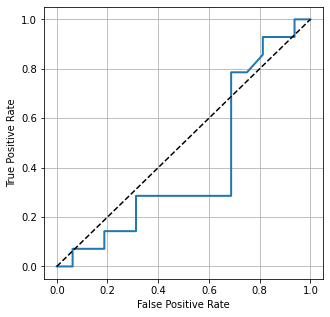

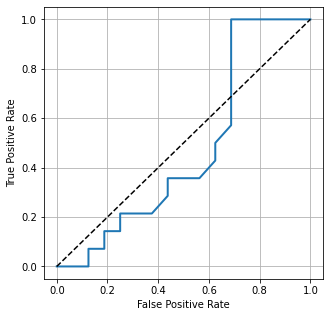

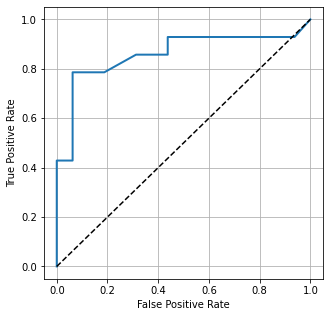

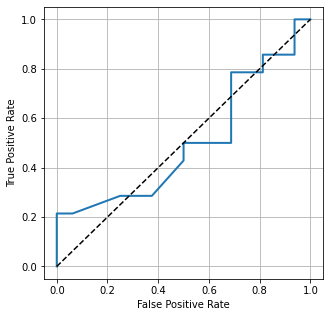

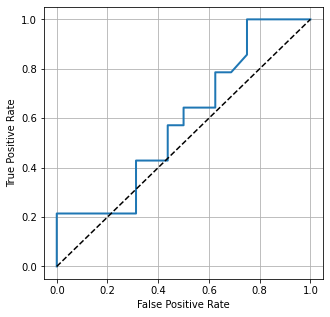

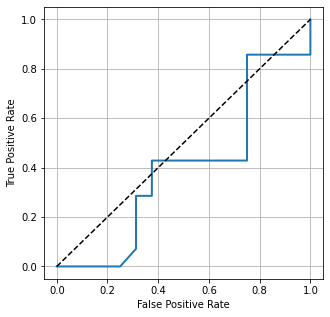

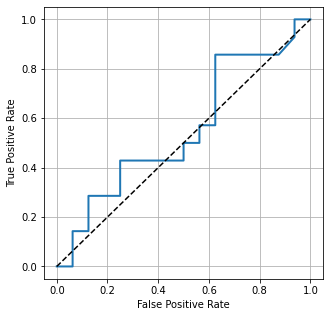

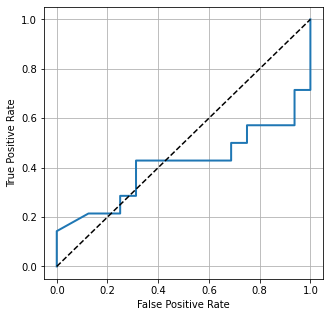

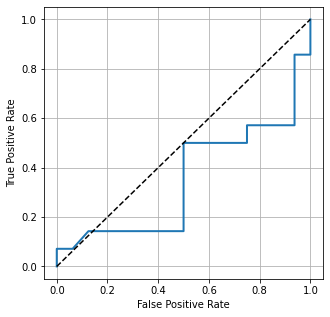

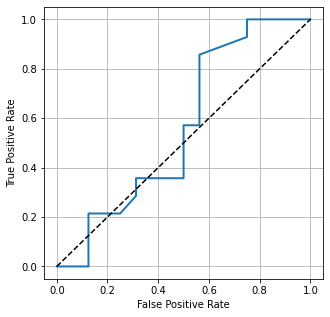

In [18]:
rfc_auc_scores = []

for i in range(10):
    rfc = RandomForestClassifier()
    rfc_labels, rfc_predictions = GKF_randfor_val_proba(data, median_labels, rfc)
    fpr, tpr, thresholds = roc_curve(rfc_labels, np.array(rfc_predictions)[:, 0])
    filename = f"graphs\Rfc_graphs\g{i}"
    plot_roc_curve(fpr, tpr, filename)
    rfc_auc_scores.append(roc_auc_score(rfc_labels, np.array(rfc_predictions)[:, 0]))

rfc_auc_scores = np.array(rfc_auc_scores)

In [19]:
rfc_auc_scores.mean(), rfc_auc_scores.std()

(0.5102678571428572, 0.1385590879538106)

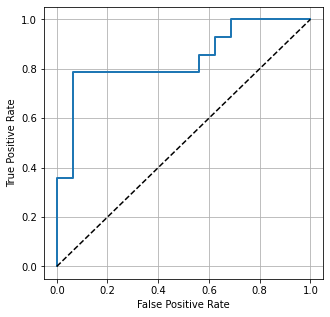

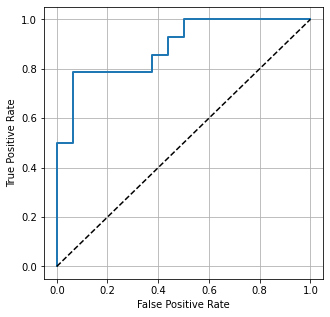

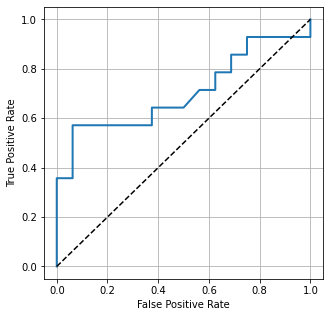

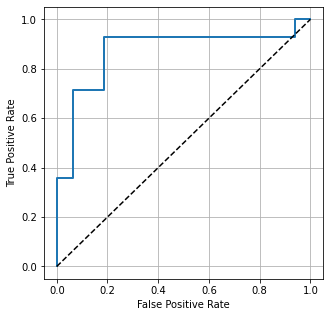

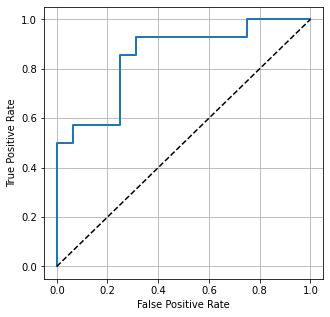

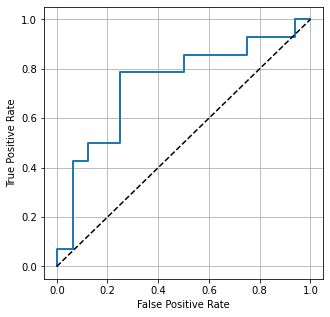

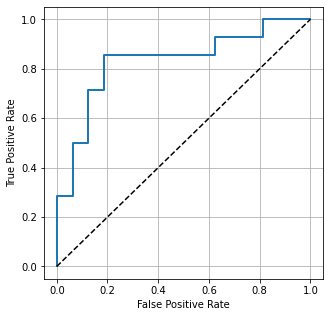

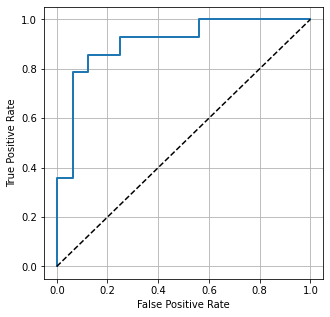

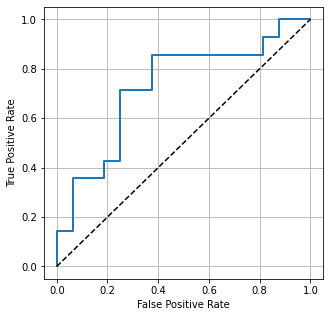

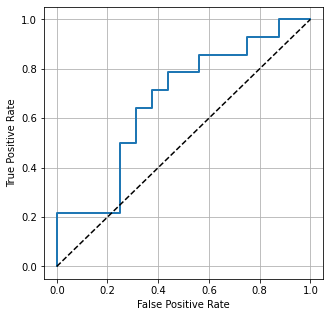

In [20]:
svc_auc_scores = []

for i in range(10):
    svc = SVC(probability= True)
    svc_labels, svc_predictions = GKF_cross_val_proba(data, median_labels, svc)
    fpr, tpr, thresholds = roc_curve(svc_labels, np.array(svc_predictions)[:, 0])
    filename = f"graphs\svc_graphs\g{i}"
    plot_roc_curve(fpr, tpr, filename)
    svc_auc_scores.append(roc_auc_score(svc_labels, np.array(svc_predictions)[:, 0]))

svc_auc_scores = np.array(svc_auc_scores)

In [21]:
svc_auc_scores.mean(), svc_auc_scores.std()

(0.8024553571428571, 0.0799297288830084)

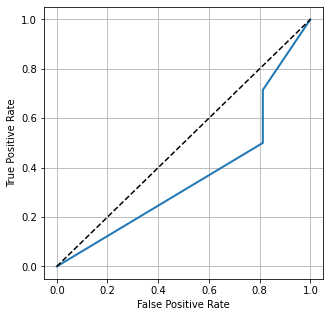

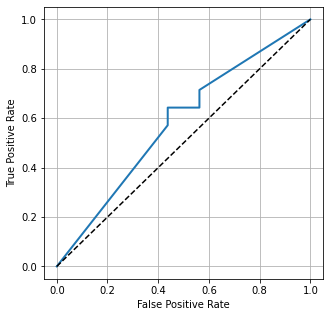

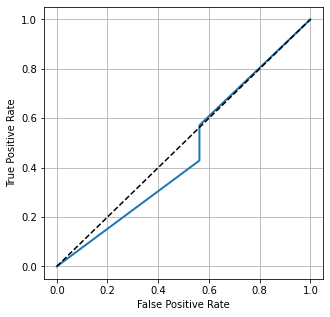

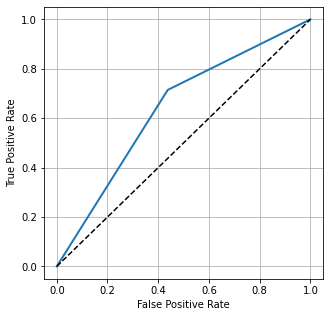

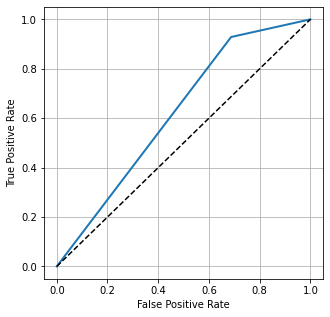

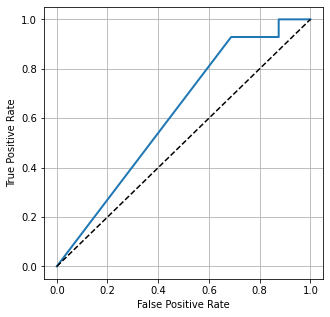

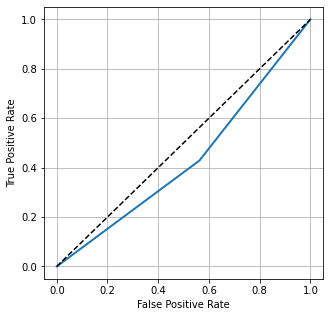

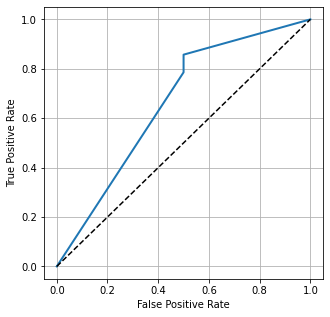

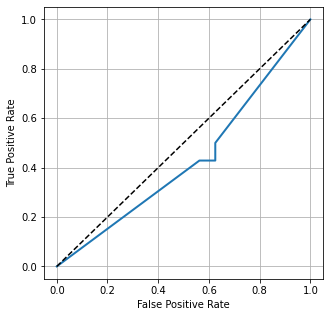

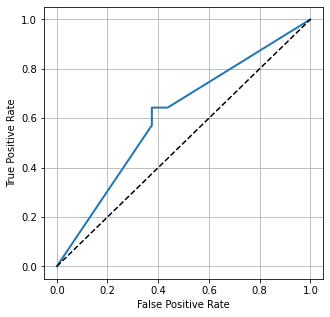

In [22]:
sgd_auc_scores = []

for i in range(10):
    sgdc = SGDClassifier(loss= 'log_loss')
    sgd_labels, sgd_predictions = GKF_cross_val_proba(data, median_labels, sgdc)
    fpr, tpr, thresholds = roc_curve(sgd_labels, np.array(sgd_predictions)[:, 0])
    filename = f"graphs\sgd_graphs\g{i}"
    plot_roc_curve(fpr, tpr, filename)
    sgd_auc_scores.append(roc_auc_score(sgd_labels, np.array(sgd_predictions)[:, 0]))

sgd_auc_scores = np.array(sgd_auc_scores)

In [23]:
sgd_auc_scores.mean(), sgd_auc_scores.std()

(0.5417410714285714, 0.10193368200034746)

In [24]:
knn = KNeighborsClassifier()
knn_labels, knn_predictions = GKF_cross_val_proba(data, median_labels, knn)

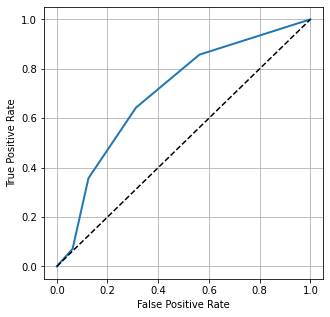

In [25]:
fpr, tpr, thresholds = roc_curve(knn_labels, np.array(knn_predictions)[:, 0])
plot_roc_curve(fpr, tpr, f"graphs\knn_graphs\g1")

In [26]:
roc_auc_score(knn_labels, np.array(knn_predictions)[:, 0])

0.703125

In [27]:
breaaek =
#All code underneath this point was for ternary classifiers that did not work, so ignore

SyntaxError: invalid syntax (4216039951.py, line 1)

In [ ]:
m1_scores_list = m1_scores.T[0].values.tolist()
m2_scores_list = m2_scores.T[0].values.tolist()
finals_scores_list = finals_scores.T[0].values.tolist()

In [ ]:
def low_med_high(df, scores):
    percent33 = df.quantile(0.33, axis= 1)[0]
    percent66 = df.quantile(0.66, axis= 1)[0]
    labels = []
    for score in scores:
        if score >= percent66:
            labels.append("A")
        elif score < percent66 and score > percent33:
            labels.append("B")
        elif score <= percent33:
            labels.append("C")
    return labels

In [ ]:
m1_tern_cls = pd.DataFrame(low_med_high(m1_scores, m1_scores_list)).T
m2_tern_cls = pd.DataFrame(low_med_high(m2_scores, m2_scores_list)).T
finals_tern_cls = pd.DataFrame(low_med_high(finals_scores, finals_scores_list)).T

In [ ]:
tern_labels = pd.concat([m1_tern_cls, m2_tern_cls, finals_tern_cls], axis= 1)
tern_labels

,0,1,2,3,4,5,6,7,8,9,...,0,1,2,3,4,5,6,7,8,9
0,B,A,B,B,C,C,C,A,A,A,...,A,A,A,B,B,B,C,A,C,C


In [ ]:
rfc = RandomForestClassifier()
rfc_tern_labels, rfc_tern_predictions = GKF_randfor_val(data, tern_labels, rfc)

Train:  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 20 21 22 23 24 25
 26 27 28] Test:  [ 9 19 29]
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Train:  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25
 26 27 29] Test:  [ 8 18 28]
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Train:  [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25
 26 28 29] Test:  [ 7 17 27]
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Train:  [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25
 27 28 29] Test:  [ 6 16 26]
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Train:  [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 26
 27 28 29] Test:  [ 5 15 25]
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Train:  [ 0  1  2  3  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 25 26
 27 28 29] Test:  [ 4 14 24]
Fitting 3 folds for each 

In [ ]:
accuracy_score(rfc_tern_labels, rfc_tern_predictions)

0.3

In [ ]:
confusion_matrix(rfc_tern_labels, rfc_tern_predictions)

array([[3, 2, 7],
       [4, 0, 4],
       [3, 1, 6]], dtype=int64)

In [ ]:
svc = SVC(probability= True)
svc_tern_labels, svc_tern_predictions = GKF_cross_val(data, tern_labels, svc)

Train:  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 20 21 22 23 24 25
 26 27 28] Test:  [ 9 19 29]
Train:  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25
 26 27 29] Test:  [ 8 18 28]
Train:  [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25
 26 28 29] Test:  [ 7 17 27]
Train:  [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25
 27 28 29] Test:  [ 6 16 26]
Train:  [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 26
 27 28 29] Test:  [ 5 15 25]
Train:  [ 0  1  2  3  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 25 26
 27 28 29] Test:  [ 4 14 24]
Train:  [ 0  1  2  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 24 25 26
 27 28 29] Test:  [ 3 13 23]
Train:  [ 0  1  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 23 24 25 26
 27 28 29] Test:  [ 2 12 22]
Train:  [ 0  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 22 23 24 25 26
 27 28 29] Test:  [ 1 11 21]
Train:  [ 

In [ ]:
accuracy_score(svc_tern_labels, svc_tern_predictions)

0.26666666666666666

In [ ]:
confusion_matrix(svc_tern_labels, svc_tern_predictions)

array([[4, 3, 5],
       [8, 0, 0],
       [6, 0, 4]], dtype=int64)

In [ ]:
sgdc = SGDClassifier(loss= 'log_loss')
sgd_tern_labels, sgd_tern_predictions = GKF_cross_val(data, tern_labels, sgdc)

Train:  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 20 21 22 23 24 25
 26 27 28] Test:  [ 9 19 29]
Train:  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25
 26 27 29] Test:  [ 8 18 28]
Train:  [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25
 26 28 29] Test:  [ 7 17 27]
Train:  [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25
 27 28 29] Test:  [ 6 16 26]
Train:  [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 26
 27 28 29] Test:  [ 5 15 25]
Train:  [ 0  1  2  3  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 25 26
 27 28 29] Test:  [ 4 14 24]
Train:  [ 0  1  2  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 24 25 26
 27 28 29] Test:  [ 3 13 23]
Train:  [ 0  1  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 23 24 25 26
 27 28 29] Test:  [ 2 12 22]
Train:  [ 0  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 22 23 24 25 26
 27 28 29] Test:  [ 1 11 21]
Train:  [ 

In [ ]:
accuracy_score(sgd_tern_labels, sgd_tern_predictions)

0.23333333333333334

In [ ]:
confusion_matrix(sgd_tern_labels, sgd_tern_predictions)

array([[2, 7, 3],
       [2, 5, 1],
       [8, 2, 0]], dtype=int64)

In [ ]:
knn = KNeighborsClassifier()
knn_tern_labels, knn_tern_predictions = GKF_cross_val(data, tern_labels, knn)

Train:  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 20 21 22 23 24 25
 26 27 28] Test:  [ 9 19 29]
Train:  [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25
 26 27 29] Test:  [ 8 18 28]
Train:  [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25
 26 28 29] Test:  [ 7 17 27]
Train:  [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25
 27 28 29] Test:  [ 6 16 26]
Train:  [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 26
 27 28 29] Test:  [ 5 15 25]
Train:  [ 0  1  2  3  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 25 26
 27 28 29] Test:  [ 4 14 24]
Train:  [ 0  1  2  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 24 25 26
 27 28 29] Test:  [ 3 13 23]
Train:  [ 0  1  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 23 24 25 26
 27 28 29] Test:  [ 2 12 22]
Train:  [ 0  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 22 23 24 25 26
 27 28 29] Test:  [ 1 11 21]
Train:  [ 

In [ ]:
accuracy_score(knn_tern_labels, knn_tern_predictions)

0.23333333333333334

In [ ]:
confusion_matrix(knn_tern_labels, knn_tern_predictions)

array([[5, 4, 3],
       [6, 1, 1],
       [7, 2, 1]], dtype=int64)